# Assignment 1 Harmonic Oscillator Path Integral

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# Defining Constants
ALPHA = 2
X_START = 3/4
N_D = 600
EPSILON = (2 * np.pi) / 128
MASS = H_BAR = OMEGA = 1


In [63]:
# Helper Functions

def plot_propagator_matrix(k):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    im1 = ax1.imshow(
        np.real(k),
        origin='lower',
        interpolation='none',
        aspect='auto',
        extent=[0, N_D+1, 0, N_D+1]
    )
    fig.colorbar(im1, ax=ax1, label='Re[K(i, j)]')
    ax1.set_xlabel('j index')
    ax1.set_ylabel('i index')
    ax1.set_title('Elementary Propagator (Real part)')

    im2 = ax2.imshow(
        np.imag(k),
        origin='lower',
        interpolation='none',
        aspect='auto',
        extent=[0, N_D+1, 0, N_D+1]
    )
    fig.colorbar(im2, ax=ax2, label='Im[K(i, j)]')
    ax2.set_xlabel('j index')
    ax2.set_ylabel('i index')
    ax2.set_title('Elementary Propagator (Imag part)')

    plt.tight_layout()
    plt.show()

As suggested in the problem I will create an array to represent discrete values of the electron wave function

In [64]:
def wave_function (x):
    prefactor = (ALPHA / np.pi) ** (1/4)
    exponent = (-ALPHA/2) * (x - X_START) ** 2
    return prefactor * np.exp(exponent)

x_array = np.linspace(-4, 4, N_D + 1)
delta_x = x_array[1] - x_array[0]

wave_function_0 = np.array(
    [wave_function(x) for x in x_array], 
    dtype=np.complex128
)

## Problem A 

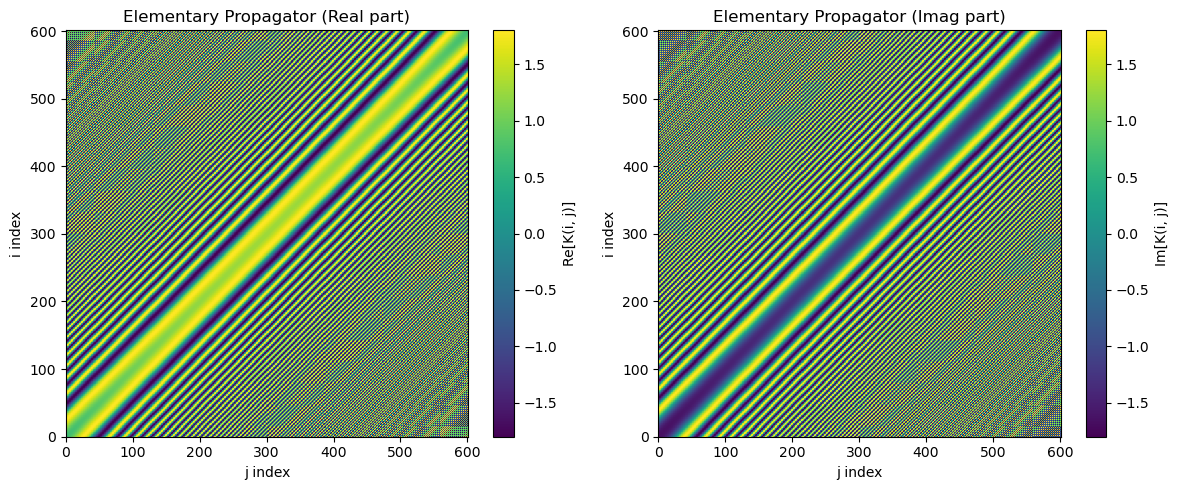

In [65]:
k_eps = np.zeros((N_D + 1, N_D + 1), dtype=np.complex64)

def elementary_propagator(xi, xj):
    prefactor = np.sqrt(MASS * OMEGA / (2.0 * np.pi * 1j * H_BAR * np.sin(OMEGA * EPSILON)))
    exponent = (
        (1j * MASS * OMEGA / (2.0 * H_BAR * np.sin(OMEGA * EPSILON))) * 
        ((xi**2 + xj**2) * np.cos(OMEGA * EPSILON) - (2.0 * xi * xj))
    )
    return prefactor * np.exp(exponent)

for i in range(N_D + 1):
    for j in range(N_D + 1):
        k_eps[i, j] = elementary_propagator(x_array[i], x_array[j])

plot_propagator_matrix(k_eps)

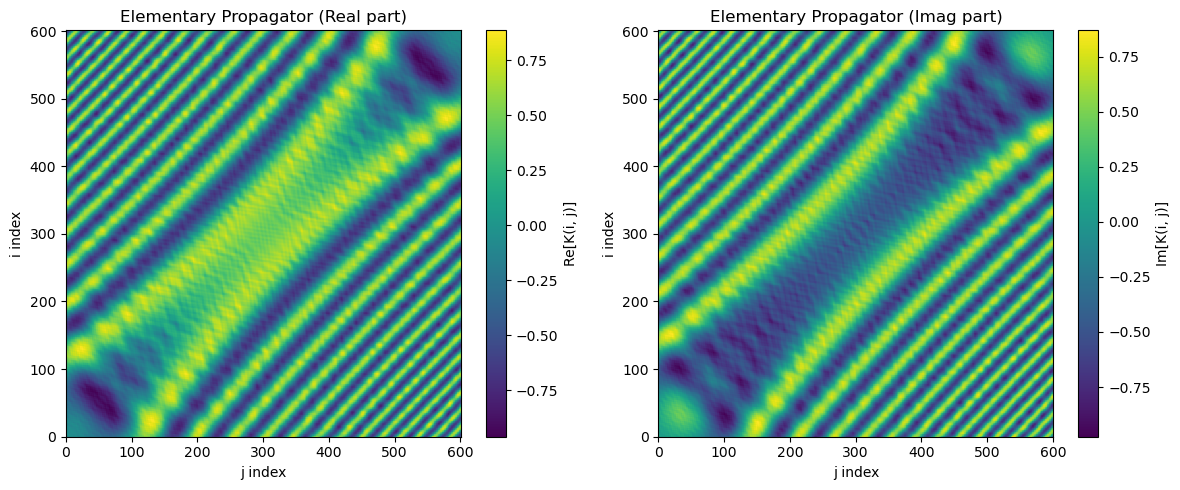

In [66]:
timesteps = 8

k_8eps = (delta_x ** (timesteps - 1)) *  np.linalg.matrix_power(k_eps, timesteps) 
plot_propagator_matrix(k_8eps)

In [67]:
print(k_8eps)

[[-0.05955857+0.01786716j -0.07576122+0.02170276j -0.07967379+0.05414069j
  ... -0.46505934-0.30932662j -0.35439298-0.42735606j
  -0.2168743 -0.50917196j]
 [-0.07576125+0.02170283j -0.0896081 +0.03330258j -0.08308481+0.06724797j
  ... -0.5340409 -0.16837671j -0.4614194 -0.31131655j
  -0.3543931 -0.42735562j]
 [-0.07967392+0.05414072j -0.08308499+0.06724811j -0.06226969+0.0930306j
  ... -0.5640737 -0.01040979j -0.53404117-0.16837703j
  -0.46506009-0.3093264j ]
 ...
 [-0.46505934-0.3093265j  -0.5340409 -0.1683766j  -0.5640738 -0.01040973j
  ... -0.06227011+0.09303051j -0.08308521+0.06724772j
  -0.0796742 +0.05414026j]
 [-0.3543929 -0.42735612j -0.46141946-0.3113167j  -0.53404105-0.16837695j
  ... -0.08308517+0.06724776j -0.08960827+0.03330211j
  -0.0757613 +0.02170216j]
 [-0.2168743 -0.5091721j  -0.3543931 -0.42735577j -0.4650602 -0.30932644j
  ... -0.07967409+0.05414031j -0.07576124+0.02170226j
  -0.05955863+0.01786645j]]


## Problem B

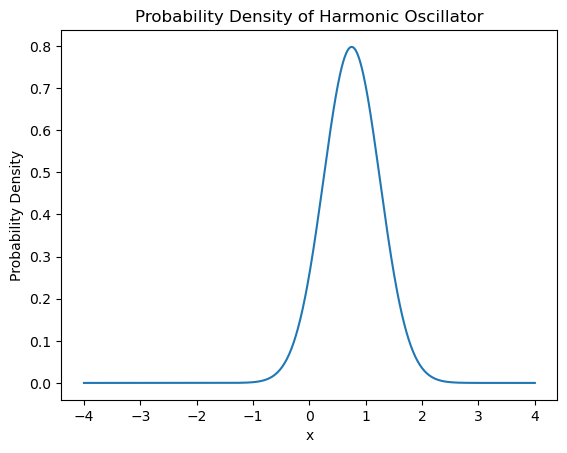

In [ ]:
probability_density_0 = np.abs(wave_function_0) ** 2

plt.title('Probability Density of Harmonic Oscillator')
plt.xlabel('x')
plt.ylabel('Probability Density')

plt.plot(x_array, probability_density_0)
plt.show()


In [69]:
probability_density_list = []

wave_function_n = wave_function_0.copy()

for i in range(timesteps + 1):
    probability_density_list.append(np.abs(wave_function_n) ** 2)
    wave_function_np1 = np.dot(k_eps, wave_function_n) * delta_x
    wave_function_n = wave_function_np1

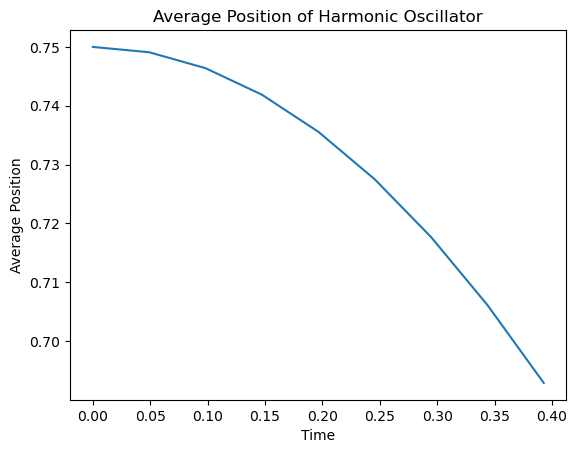

In [70]:
time_array = np.linspace(0, 8 * EPSILON, 9)
avg_x_array = np.zeros(timesteps + 1)

for i in range(timesteps + 1):
    avg_x_array[i] = np.sum(x_array * probability_density_list[i] * delta_x)

plt.plot(time_array, avg_x_array)
plt.title('Average Position of Harmonic Oscillator')
plt.xlabel('Time')
plt.ylabel('Average Position')
plt.show()



In [ ]:
wave_function = wave_function_0.copy()

for step in range(1000):
    wave_function = k_eps @ wave_function 

## Problem C

## Problem D

(601,)
9
0.7978668302318547
0.7950097215350024
0.786630630646792
0.7732688901776644
0.755886541104486
0.7353667545778135
0.7128430939550711
0.6891460971357385


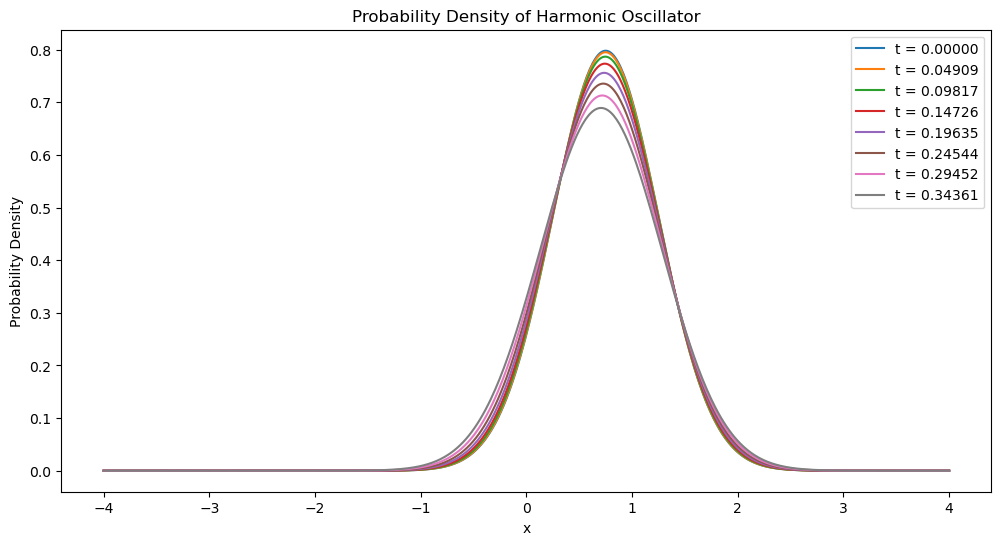

In [71]:
# Plot probability densities for each time step on one plot
fig, ax = plt.subplots(figsize=(12, 6))

print(x_array.shape)
print(len(probability_density_list))
for i in range(timesteps):
    print(np.max(probability_density_list[i]))
    ax.plot(x_array, probability_density_list[i], label=f't = {i * EPSILON:.5f}')

ax.set_title('Probability Density of Harmonic Oscillator')
ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.legend()
plt.show()